### Cleaning/Formatting Flat File Source  
Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:  
Replace Headers  
Format data into a more readable format  
Identify outliers and bad data  
Find duplicates  
Fix casing or inconsistent values  


In [25]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
# load the dataset

df_ky = pd.read_csv('louisville_crime2003to2017.csv')

C:\Users\Saurabh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
# View first 5 rows

df_ky.head(5)

,Unnamed: 0,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,Time To Report in Days,YEAR_OCCURED
0,0,80-13-099806,2014-01-01 04:00:54,2013-12-20 12:31:00,"FRAUDULENT USE OF CREDIT CARDS U/$10,000",FRAUD,26B,PART II,COMPLETED,METRO LOUISVILLE,METRO,OTHER / UNKNOWN,COMMUNITY AT LARGE,LOUISVILLE,40056,830668,0.645764,2013.0
1,1,80-13-099861,2014-01-01 09:14:59,2013-12-22 03:00:00,THEFT OR DISP PARTS/CONT FROM VEH UNDER $500,VEHICLE BREAK-IN/THEFT,23F,PART I,COMPLETED,8TH DIVISION,823,RESIDENCE / HOME,14300 BLOCK WAKEFIELD PL ...,LOUISVILLE,40245,830675,0.260405,2013.0
2,2,80-13-099923,2014-01-01 19:52:19,2014-01-01 18:56:19,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,624,PARKING LOT / GARAGE,4600 BLOCK WATTBOURNE LN ...,LOUISVILLE,40299,830683,0.038889,2014.0
3,3,80-13-099961,2014-01-01 01:38:01,2014-01-01 01:19:01,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,S 26TH ST / OSAGE AVE ...,LOUISVILLE,40210,830689,0.013194,2014.0
4,4,80-13-099953,2014-01-01 00:05:00,2014-01-01 00:00:00,TERRORISTIC THREATENING 3RD DEGREE,ASSAULT,13C,PART II,COMPLETED,4TH DIVISION,435,RESIDENCE / HOME,4000 BLOCK WOODRUFF AVE ...,LOUISVILLE,40215,830798,0.003472,2014.0


### 1. Subset Variables(Columns). Dropping unnecessary columns in a DataFrame


In [28]:
# Retain required columns. Select multiple columns with specific names.

df_ky = df_ky[['CRIME_TYPE', 'CITY', 'ZIP_CODE', 'YEAR_OCCURED']]
df_ky

,CRIME_TYPE,CITY,ZIP_CODE,YEAR_OCCURED
0,FRAUD,LOUISVILLE,40056,2013.0
1,VEHICLE BREAK-IN/THEFT,LOUISVILLE,40245,2013.0
2,VANDALISM,LOUISVILLE,40299,2014.0
3,VANDALISM,LOUISVILLE,40210,2014.0
4,ASSAULT,LOUISVILLE,40215,2014.0
...,...,...,...,...
1156493,DRUGS/ALCOHOL VIOLATIONS,LOUISVILLE,40219,2005.0
1156494,ASSAULT,LOUISVILLE,40214,2005.0
1156495,SEX CRIMES,LOUISVILLE,40218,2005.0
1156496,SEX CRIMES,LOUISVILLE,40211,2005.0


### 2. Replace Headers

In [29]:
# Replace headers. Renaming columns to a more recognizable set of labels.

df_ky.rename(columns={'CRIME_TYPE': 'Crime', 'CITY': 'City', 'ZIP_CODE': 'Zip Code', 'YEAR_OCCURED': 'Year'}, inplace = True)
df_ky

,Crime,City,Zip Code,Year
0,FRAUD,LOUISVILLE,40056,2013.0
1,VEHICLE BREAK-IN/THEFT,LOUISVILLE,40245,2013.0
2,VANDALISM,LOUISVILLE,40299,2014.0
3,VANDALISM,LOUISVILLE,40210,2014.0
4,ASSAULT,LOUISVILLE,40215,2014.0
...,...,...,...,...
1156493,DRUGS/ALCOHOL VIOLATIONS,LOUISVILLE,40219,2005.0
1156494,ASSAULT,LOUISVILLE,40214,2005.0
1156495,SEX CRIMES,LOUISVILLE,40218,2005.0
1156496,SEX CRIMES,LOUISVILLE,40211,2005.0


### 3. Format data into a more readable format


In [30]:
# Arrange columns into readable format and city in alphabetical order.
# Changing dataframe from column city in alphabetic order and reset index
# Drop NaN rows
# Change Year from Float to Integer.

df_ky = df_ky[['City','Crime','Year', 'Zip Code']]
df_ky.sort_values(['City'], axis = 0, ascending = True, inplace = True)
df_ky = df_ky.reset_index(drop = True)
df_ky.dropna(how='any', inplace=True)

In [31]:
# change Year from float to int
df_ky['Year'] = df_ky['Year'].astype(int)
df_ky

,City,Crime,Year,Zip Code
0,ANC,DRUGS/ALCOHOL VIOLATIONS,2011,40223
1,ANC,DRUGS/ALCOHOL VIOLATIONS,2009,40223
2,ANCHORAGE,ASSAULT,2008,40223
3,ANCHORAGE,OTHER,2003,40223
4,ANCHORAGE,THEFT/LARCENY,2006,40223
...,...,...,...,...
1152169,WTWD,OTHER,2014,40242
1152170,WTWD,BURGLARY,2011,40242
1152171,WTWD,DRUGS/ALCOHOL VIOLATIONS,2013,40242
1152172,WTWD,ASSAULT,2016,40242


### 4. Find and drop duplicates

In [32]:
# Find duplicates and drop these from our dataset

df1 = df_ky.drop_duplicates()
df1

,City,Crime,Year,Zip Code
0,ANC,DRUGS/ALCOHOL VIOLATIONS,2011,40223
1,ANC,DRUGS/ALCOHOL VIOLATIONS,2009,40223
2,ANCHORAGE,ASSAULT,2008,40223
3,ANCHORAGE,OTHER,2003,40223
4,ANCHORAGE,THEFT/LARCENY,2006,40223
...,...,...,...,...
1152160,WTWD,OTHER,2010,40242
1152163,WTWD,VANDALISM,2012,40242
1152164,WTWD,SEX CRIMES,2010,40242
1152167,WTWD,VEHICLE BREAK-IN/THEFT,2010,40242


### 5. Identify outliers and bad data

<AxesSubplot:>

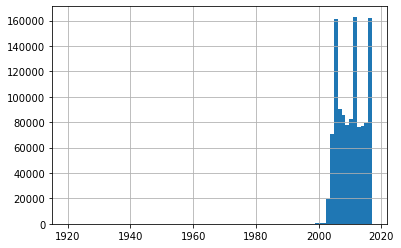

In [37]:
# column (Year) to find outliers

df1['Year'].hist(bins=80)

In [34]:
# Approx before 2004 seems to have outliers. T get rid of those outliers

df1 = df1[df1.Year >= 2004]

# check to see if correct

df1.sort_values(['Year'], axis = 0, ascending = True, inplace = True)
df1

<ipython-input-34-c2bca91b8352>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(['Year'], axis = 0, ascending = True, inplace = True)


,City,Crime,Year,Zip Code
329775,LOUISVILLE,MOTOR VEHICLE THEFT,2004,40211.0
1141651,SHIVELY,MOTOR VEHICLE THEFT,2004,40208
283235,LOUISVILLE,THEFT/LARCENY,2004,40211
283236,LOUISVILLE,DRUGS/ALCOHOL VIOLATIONS,2004,40212
283237,LOUISVILLE,DRUGS/ALCOHOL VIOLATIONS,2004,40217
...,...,...,...,...
1240,COLDSTREAM,ASSAULT,2017,40245
562289,LOUISVILLE,FRAUD,2017,40229
562286,LOUISVILLE,FRAUD,2017,40212
1145491,ST_MATTHEWS,THEFT/LARCENY,2017,40207


### 6. Fix casing or inconsistent values


In [38]:
# Fixing casing on crime column and city column where first word are capital and rest lower case.
# Resetting index and arranging order by city name alphabetically for readable format

df1['Crime'].value_counts()
df1['Crime'] = df1['Crime'].str.title()
df1['Crime'].value_counts()
df1['City'].value_counts()
df1['City'] = df1['City'].str.title()
df1['City'].value_counts()
df1 = df1.reset_index(drop = True)
df1.sort_values(['City'], axis = 0, ascending = True, inplace = True)


In [39]:
# View the first 10 rows of the cleaned dataframe.

df1.head(10)

,City,Crime,Year,Zip Code
0,Anc,Drugs/Alcohol Violations,2011,40223
1,Anc,Drugs/Alcohol Violations,2009,40223
25,Anchorage,Drugs/Alcohol Violations,2004,40223
26,Anchorage,Assault,2008,40223
27,Anchorage,Other,2003,40223
28,Anchorage,Theft/Larceny,2003,40223
29,Anchorage,Sex Crimes,2003,40223
30,Anchorage,Assault,2007,40223
31,Anchorage,Drugs/Alcohol Violations,2004,40223
32,Anchorage,Drugs/Alcohol Violations,2016,40223
